## Grant's code from fMRI decoding tutorial
 
[Nilearn tutorial] (https://nilearn.github.io/auto_examples/plot_decoding_tutorial.html#decoding-with-support-vector-machine)

In [1]:
# import operating system and change working directory to folder with the data

import os
os.chdir('hallu')
os.getcwd()

'/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu'

In [2]:
# import important tools

import numpy as np # import basic numerical functions for python
import nibabel as nib # Read / write access to some common neuroimaging file formats
import nilearn # Statistics for neuroimaging in python
import matplotlib.pyplot as plt

In [3]:
# import specific functions

from nilearn import image
from nilearn.plotting import plot_epi
from scipy import stats
from nilearn.input_data import NiftiMasker

/Users/grantgonsalves/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


### *Visualizing fmri volume*

In [80]:
# change cwd to specific subject folder 

os.chdir('Data')
os.chdir('S01')
os.listdir()

['S01_func.nii', 'S01_anat.nii', 'S01.vtc', 'S01.vmr']

In [83]:
# to load and open .nii file in python use `nib.load` and `get_fdata`
S01_fimg = nib.load('S01_func.nii')
S01_data = S01_fimg.get_fdata()
# S01_data
# S01_data.shape
S01_fimg.shape

(60, 44, 50, 280)

/Users/grantgonsalves/opt/anaconda3/lib/python3.8/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


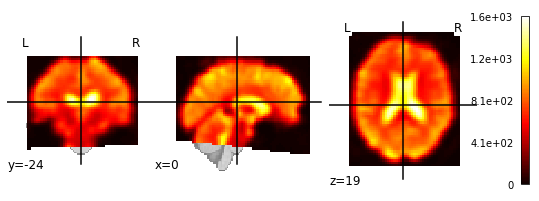

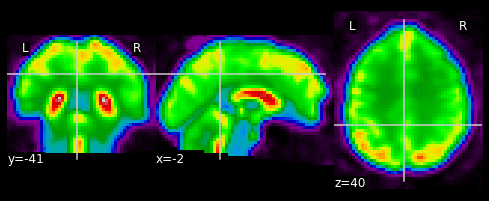

In [6]:
# to visualize a 4D nifti image
# retrieve the first volume (a 3D image) and use `plotting` fn to plot the first volume

from nilearn import image
first_S01_fimg = image.index_img(S01_fimg, 0)

from nilearn import plotting
# print(first_S01_fimg.shape)
plotting.plot_stat_map(first_S01_fimg)
plotting.plot_epi(first_S01_fimg)

In [ ]:
# to visualize selected volumes

from nilearn import plotting
selected_volumes = image.index_img(S01_fimg, slice(0, 3))
for img in image.iter_img(selected_volumes):
    plotting.plot_stat_map(img)
    plotting.plot_epi(img)

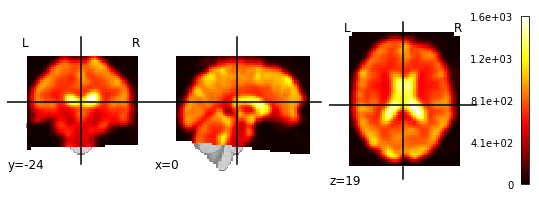

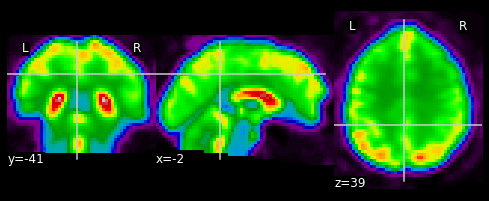

In [17]:
# to visualize mean volume of 4D fMRI data, use 'mean_image' to create a 3D image

from nilearn.image import mean_img
# plotting.view_img(mean_img(S01_fimg))
plotting.plot_stat_map(mean_img(S01_fimg))
plotting.plot_epi(mean_img(S01_fimg))

### *Feature extraction: masking*

/Users/grantgonsalves/opt/anaconda3/lib/python3.8/site-packages/nilearn/image/resampling.py:531: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/grantgonsalves/opt/anaconda3/lib/python3.8/site-packages/nilearn/image/resampling.py:273: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "



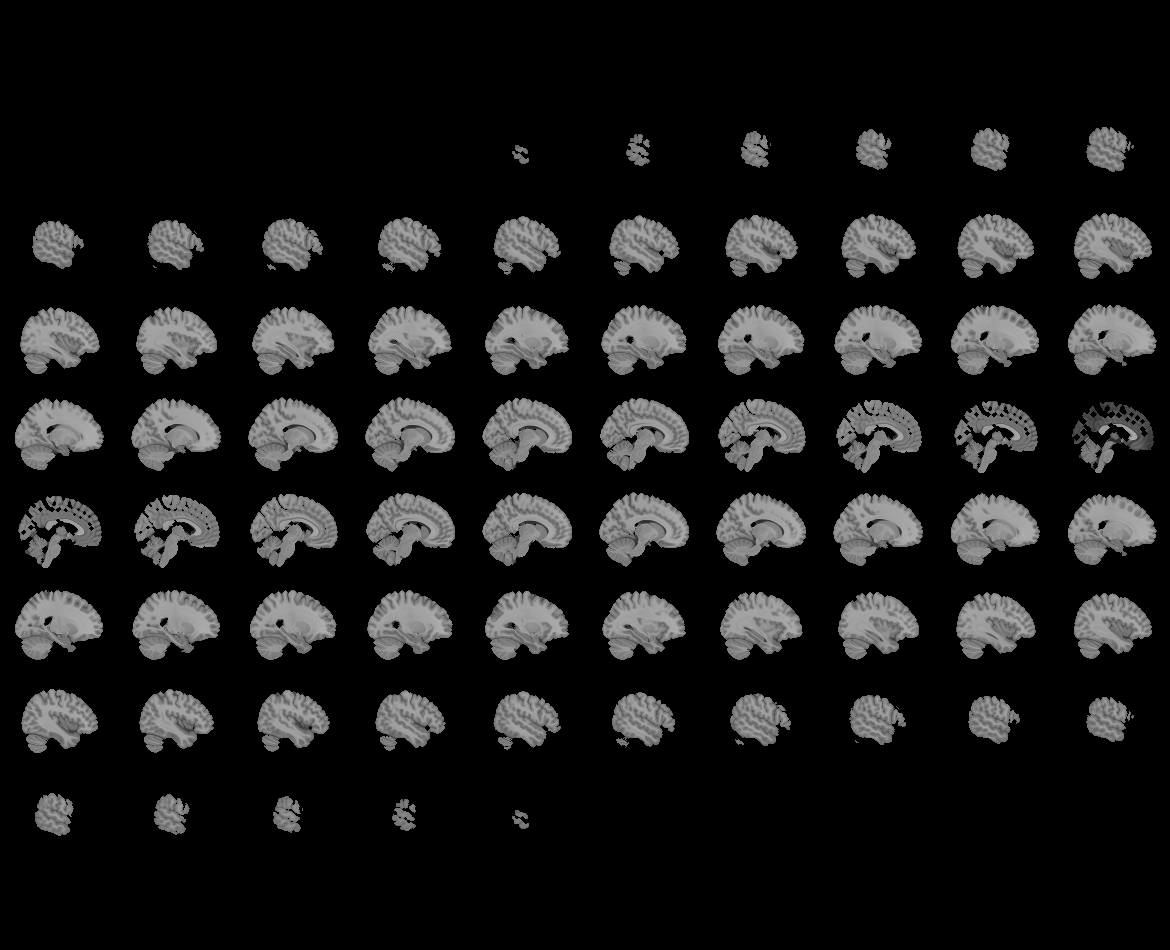
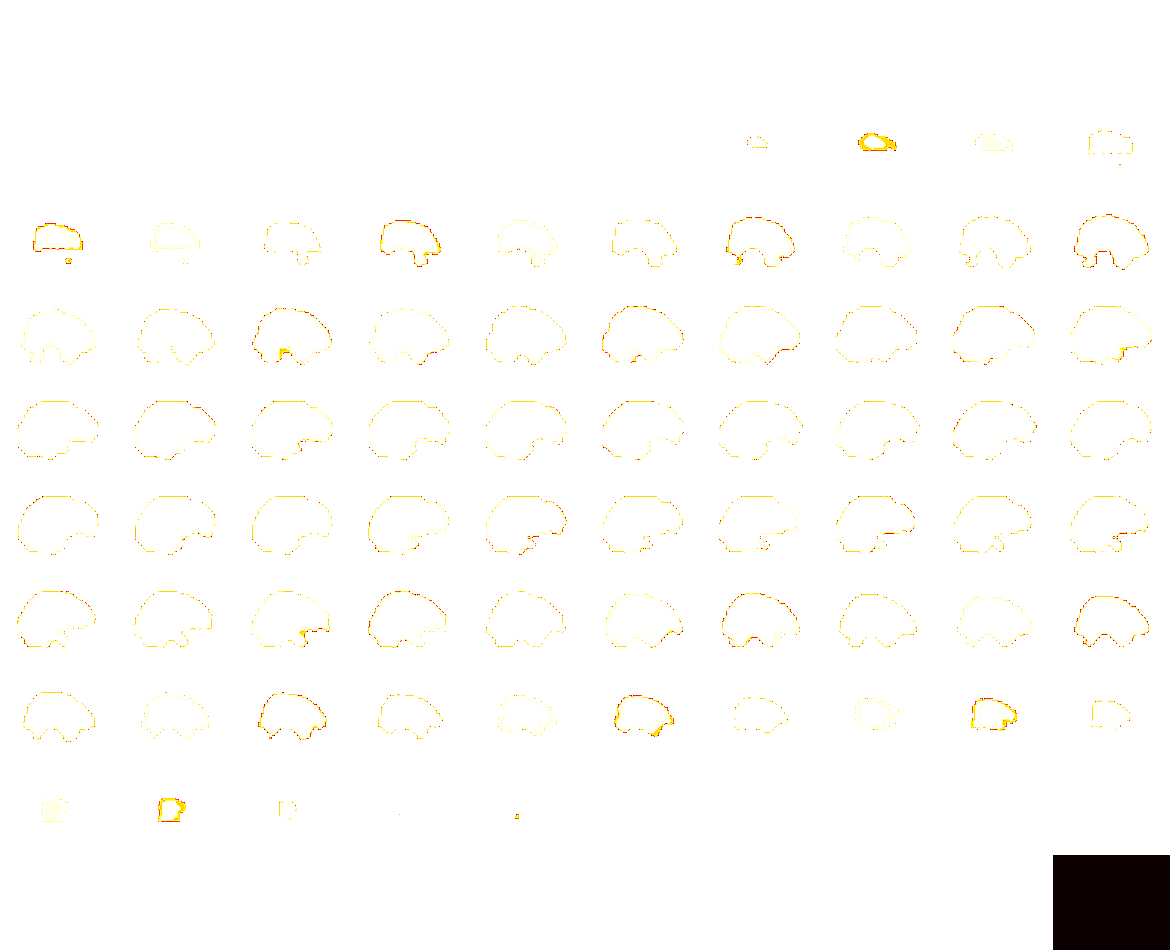

In [9]:
# to create mask use `compute_epi_mask`

from nilearn import masking
mask_mean01=masking.compute_epi_mask(S01_fimg)
plotting.view_img(mask_mean01)

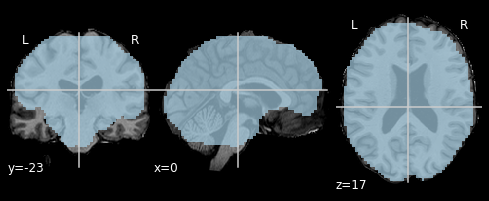

In [10]:
# to plot mask against background image

S01_anat = nib.load('S01_anat.nii')

plotting.plot_roi(mask_mean01, bg_img=S01_anat,
                  cmap='Paired')

In [7]:
# NiftiMasker is a better masking option for this study

masker = NiftiMasker(standardize=True, mask_strategy='epi')

In [ ]:
# to visualize how the masker works
# standardizes the data so that only the voxels with signals are included

plt.plot(S01_fimg.get_data().std(axis=3).flatten())

/Users/grantgonsalves/opt/anaconda3/lib/python3.8/site-packages/nilearn/plotting/displays/_slicers.py:1318: UserWarning: A non-diagonal affine is found in the given image. Reordering the image to get diagonal affine for finding cuts in the slices.
  cut_coords = find_cut_slices(img,


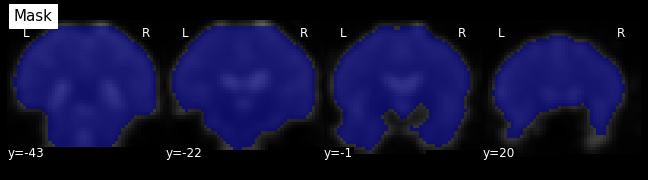

In [19]:
masker.fit(S01_fimg)
mask01=masker.mask_img_
mean01=mean_img(S01_fimg)
plotting.plot_roi(mask01, mean01, display_mode='y', cut_coords=4, title="Mask")
# masker.transform(S01_fimg).shape

In [20]:
report = masker.generate_report()
report

### *Loading the labels*

In [68]:
# check current working directory and make sure you are in the folder 'hallu'

os.getcwd()

'/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu'

In [62]:
# run Pierre's chunk to load information for labels

all_subjects = os.listdir()

%run analysis.py

#all_data = {}

all_data = []
data_path     = '.'
import nibabel as nib
        
for subject in all_subjects:
    if subject.find('DS') == -1:
        subject_number = int(subject[1:])
        label_path = os.path.join(data_path, 'Labellisations')
        func_path  = os.path.join(os.path.join(data_path, 'Data'), subject)
        print(func_path)
        #try:
        #    all_data[subject_number] = nib.load(func_path+'/S%02d_func.nii' %subject_number)
        #except Exception:
        #    print("Can not load subject", subject_number)
        try:
            all_data  += [Image(func_folder=func_path, label_folder=label_path, res_folder='tmp', pattern=subject)]
        except Exception:
            print("Problem loading subject", subject_number)

./Data/S05
./Data/S02
./Data/S34
./Data/S03
./Data/S26
./Data/S28
./Data/S10
./Data/S42
./Data/S01
./Data/S06
./Data/S30
./Data/S08
./Data/S37
./Data/S38
./Data/S07
./Data/S22
./Data/S13
./Data/S14
./Data/S40
./Data/S15
./Data/S24
./Data/S23
./Data/S41


In [67]:
# load labels (0=rest;1=on;2=off)

print(all_data[0].pattern)
print(all_data[0].labels)
print(all_data[0].labels.shape)

S05
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 2 2 2 2 2 2 2 2 2 2 0 0 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 2 2 0 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0]
(280,)


In [75]:
S01labels = np.load('S01labels.npy')
print(S01labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 1 1 1 1 1 1 1 1 0 0
 2 2 2 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 2 2 2 2 2 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]


### *Decoding with the Support Vector Machine*

In [86]:
from nilearn.decoding import Decoder
decoder = Decoder(estimator='svc', mask=mask01, standardize=True)
decoder.fit(S01_fimg, S01labels, groups=None)

In [88]:
prediction = decoder.predict(S01_fimg)

In [92]:
print(prediction)
print((prediction == S01labels).sum() / float(len(S01labels)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 1 1 1 1 1 1 1 1 0 0
 2 2 2 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 2 2 2 2 2 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
1.0


### *Cross-Validation*

In [124]:
from nilearn.image import index_img

f_train = index_img(S01_fimg, slice(0,-30))
f_test = index_img(S01_fimg, slice(-30,None))
c_train = S01labels[:-30]
c_test = S01labels[-30:]

decoder = Decoder(estimator='svc', mask=mask01, standardize=True)
decoder.fit(f_train, c_train, groups=None)

prediction = decoder.predict(f_test)

In [125]:
print("Prediction Accuracy: {:.3f}".format(
    (prediction == c_test).sum() / float(len(c_test))))

Prediction Accuracy: 0.567


In [128]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5)
fold = 0
for train, test in cv.split(S01labels):
    fold += 1
    decoder = Decoder(estimator='svc', mask=mask01, standardize=True)
    decoder.fit(index_img(S01_fimg, train), S01labels[train])
    prediction = decoder.predict(index_img(S01_fimg, test))
    print(
        "CV Fold {:01d} | Prediction Accuracy: {:.3f}".format(
            fold,
            (prediction == S01labels[test]).sum() / float(len(
                S01labels[test]))))

CV Fold 1 | Prediction Accuracy: 0.214
CV Fold 2 | Prediction Accuracy: 0.607
CV Fold 3 | Prediction Accuracy: 0.571
CV Fold 4 | Prediction Accuracy: 0.804
CV Fold 5 | Prediction Accuracy: 0.625


In [131]:
n_folds = 5
decoder = Decoder(
    estimator='svc', mask=mask01,
    standardize=True, cv=n_folds,
    scoring='accuracy'
)
decoder.fit(S01_fimg, S01labels)

In [132]:
print(decoder.cv_params_[1])

{'C': [100.0, 100.0, 100.0, 100.0, 100.0]}


In [142]:
## how do I do LeaveOneGroupOut()
## this does not work because I can't index a scalar variable but what do I use as the variable?

session_label = S01labels[1][mask01]

from sklearn.model_selection import LeaveOneGroupOut
cv = LeaveOneGroupOut()
decoder = Decoder(estimator='svc', mask=mask01, standardize=True, cv=cv)
decoder.fit(S01_fimg, S01labels, groups=session_label)
print(decoder.cv_scores_)

IndexError: invalid index to scalar variable.

### *Inspecting model weights*

In [133]:
coef_ = decoder.coef_
print(coef_)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
  -0.00128854]]


In [134]:
print(coef_.shape)

(3, 49853)



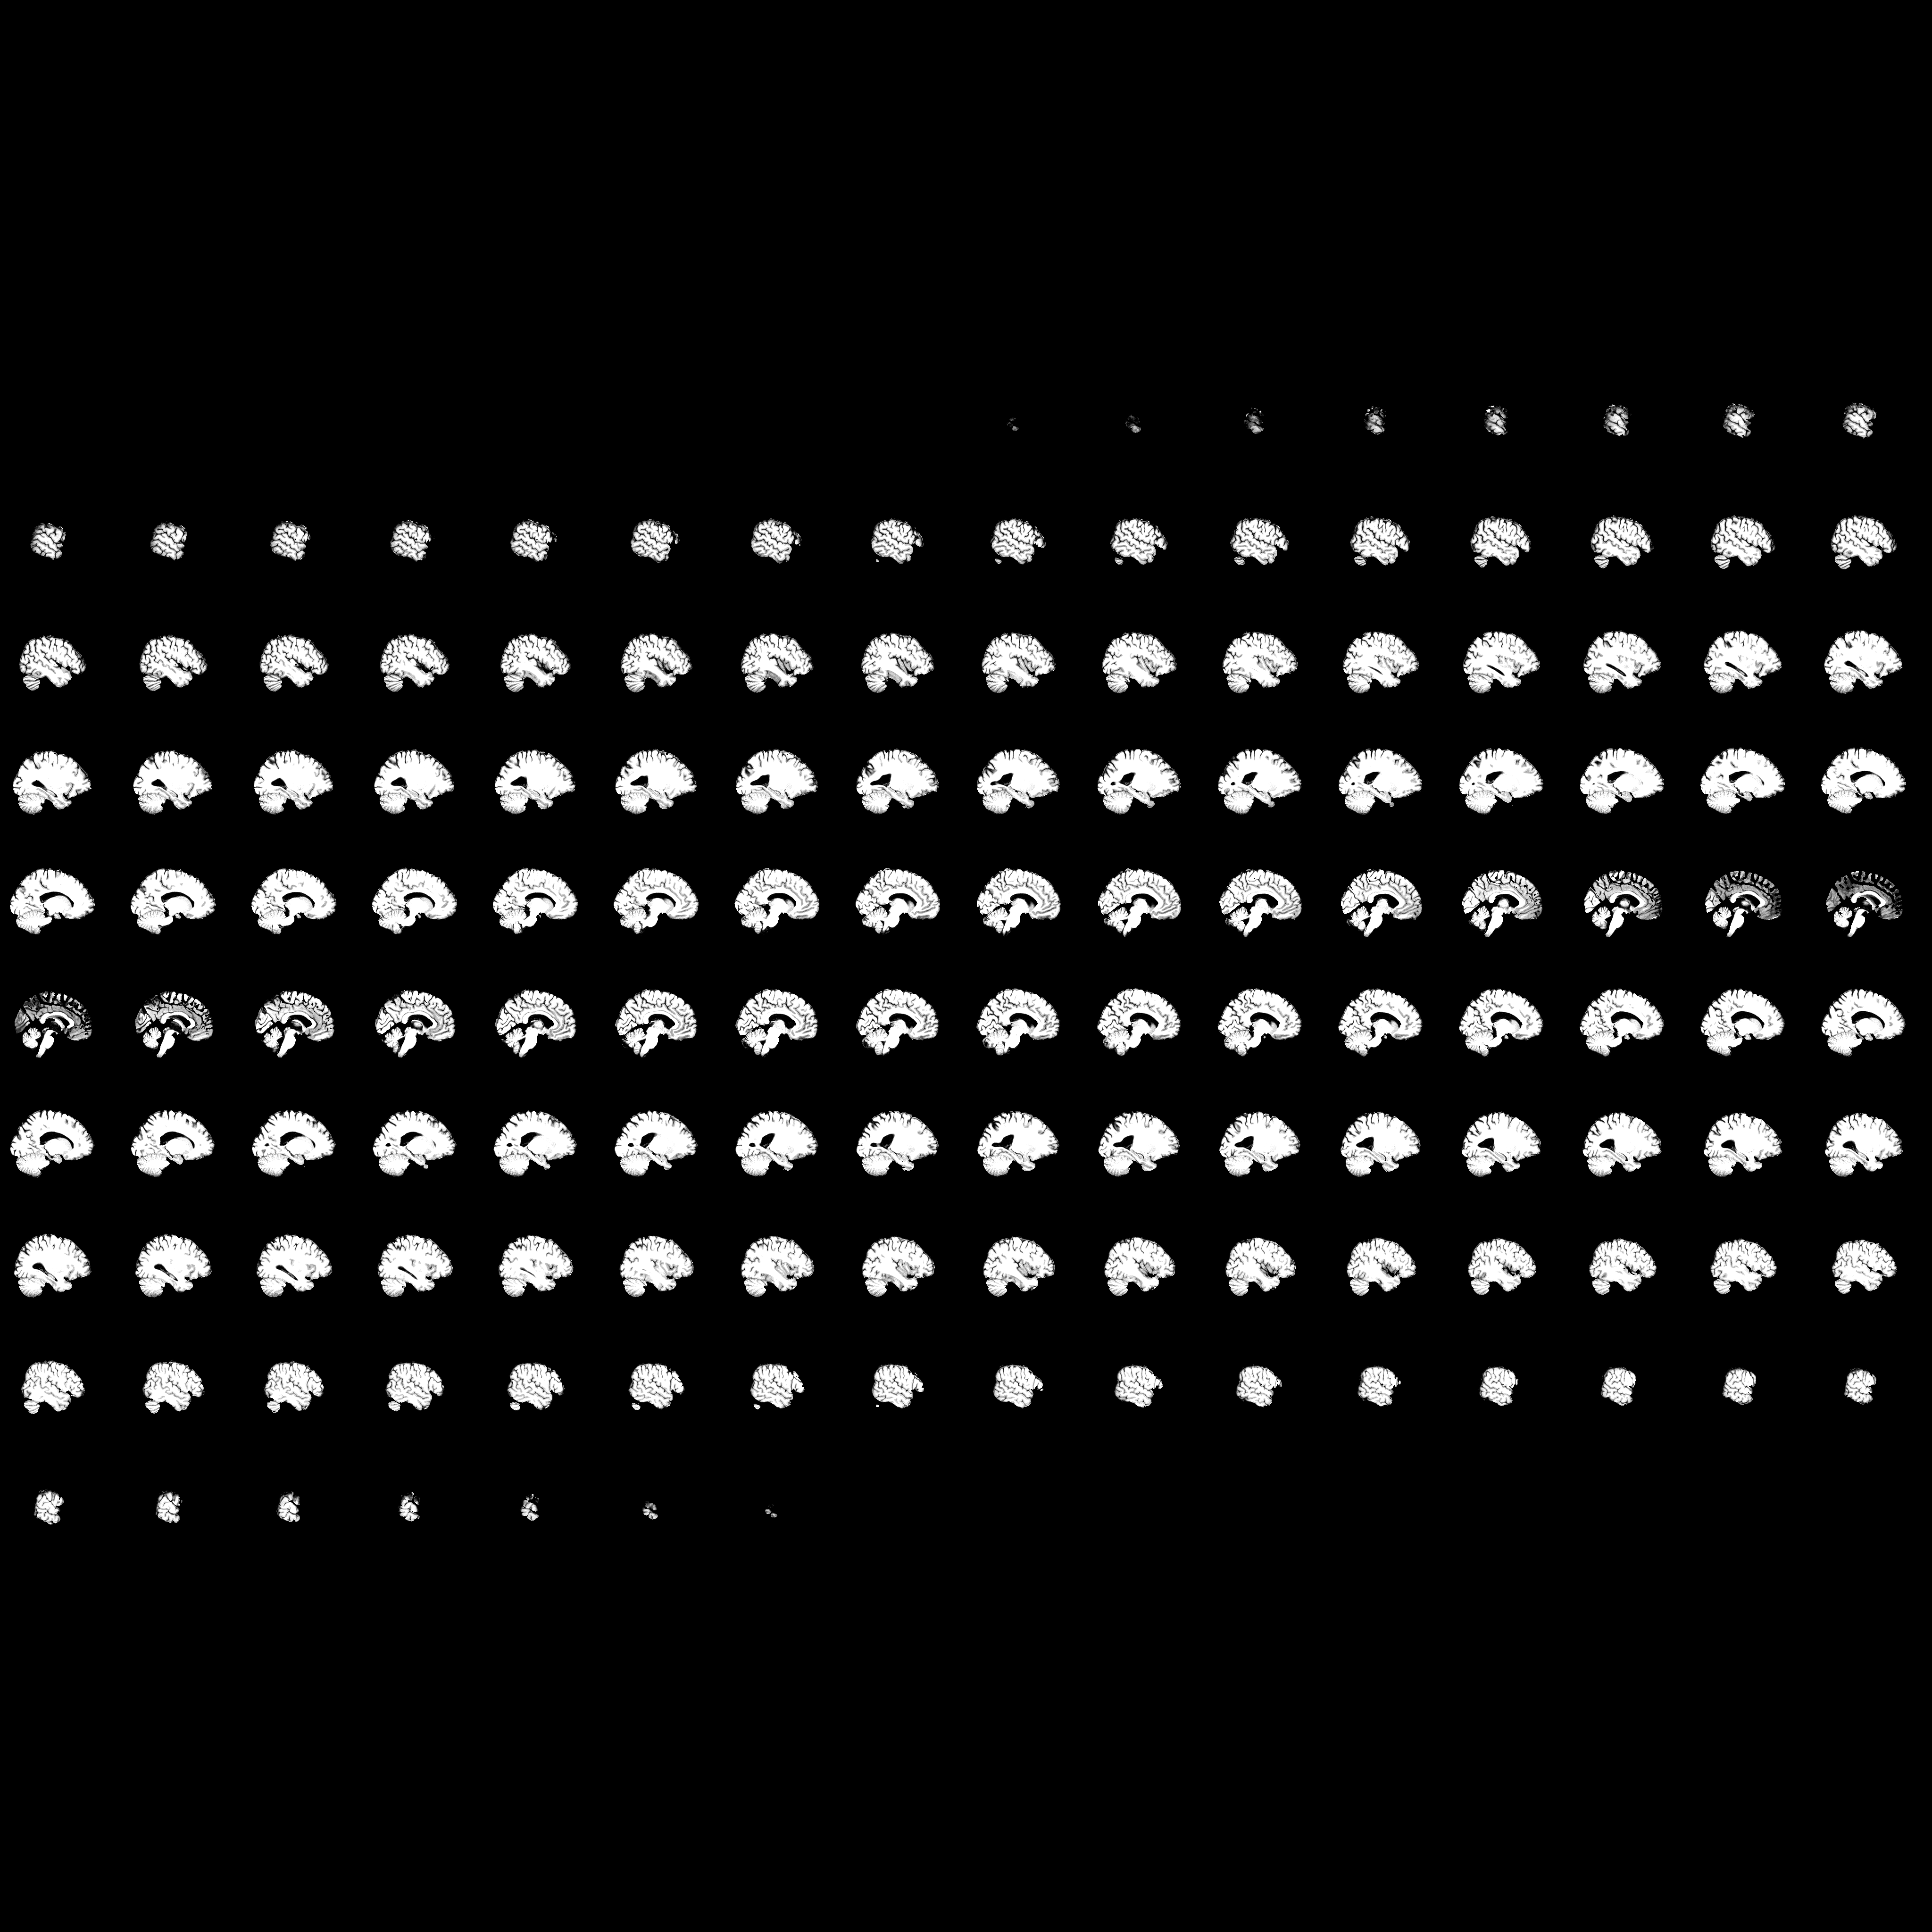
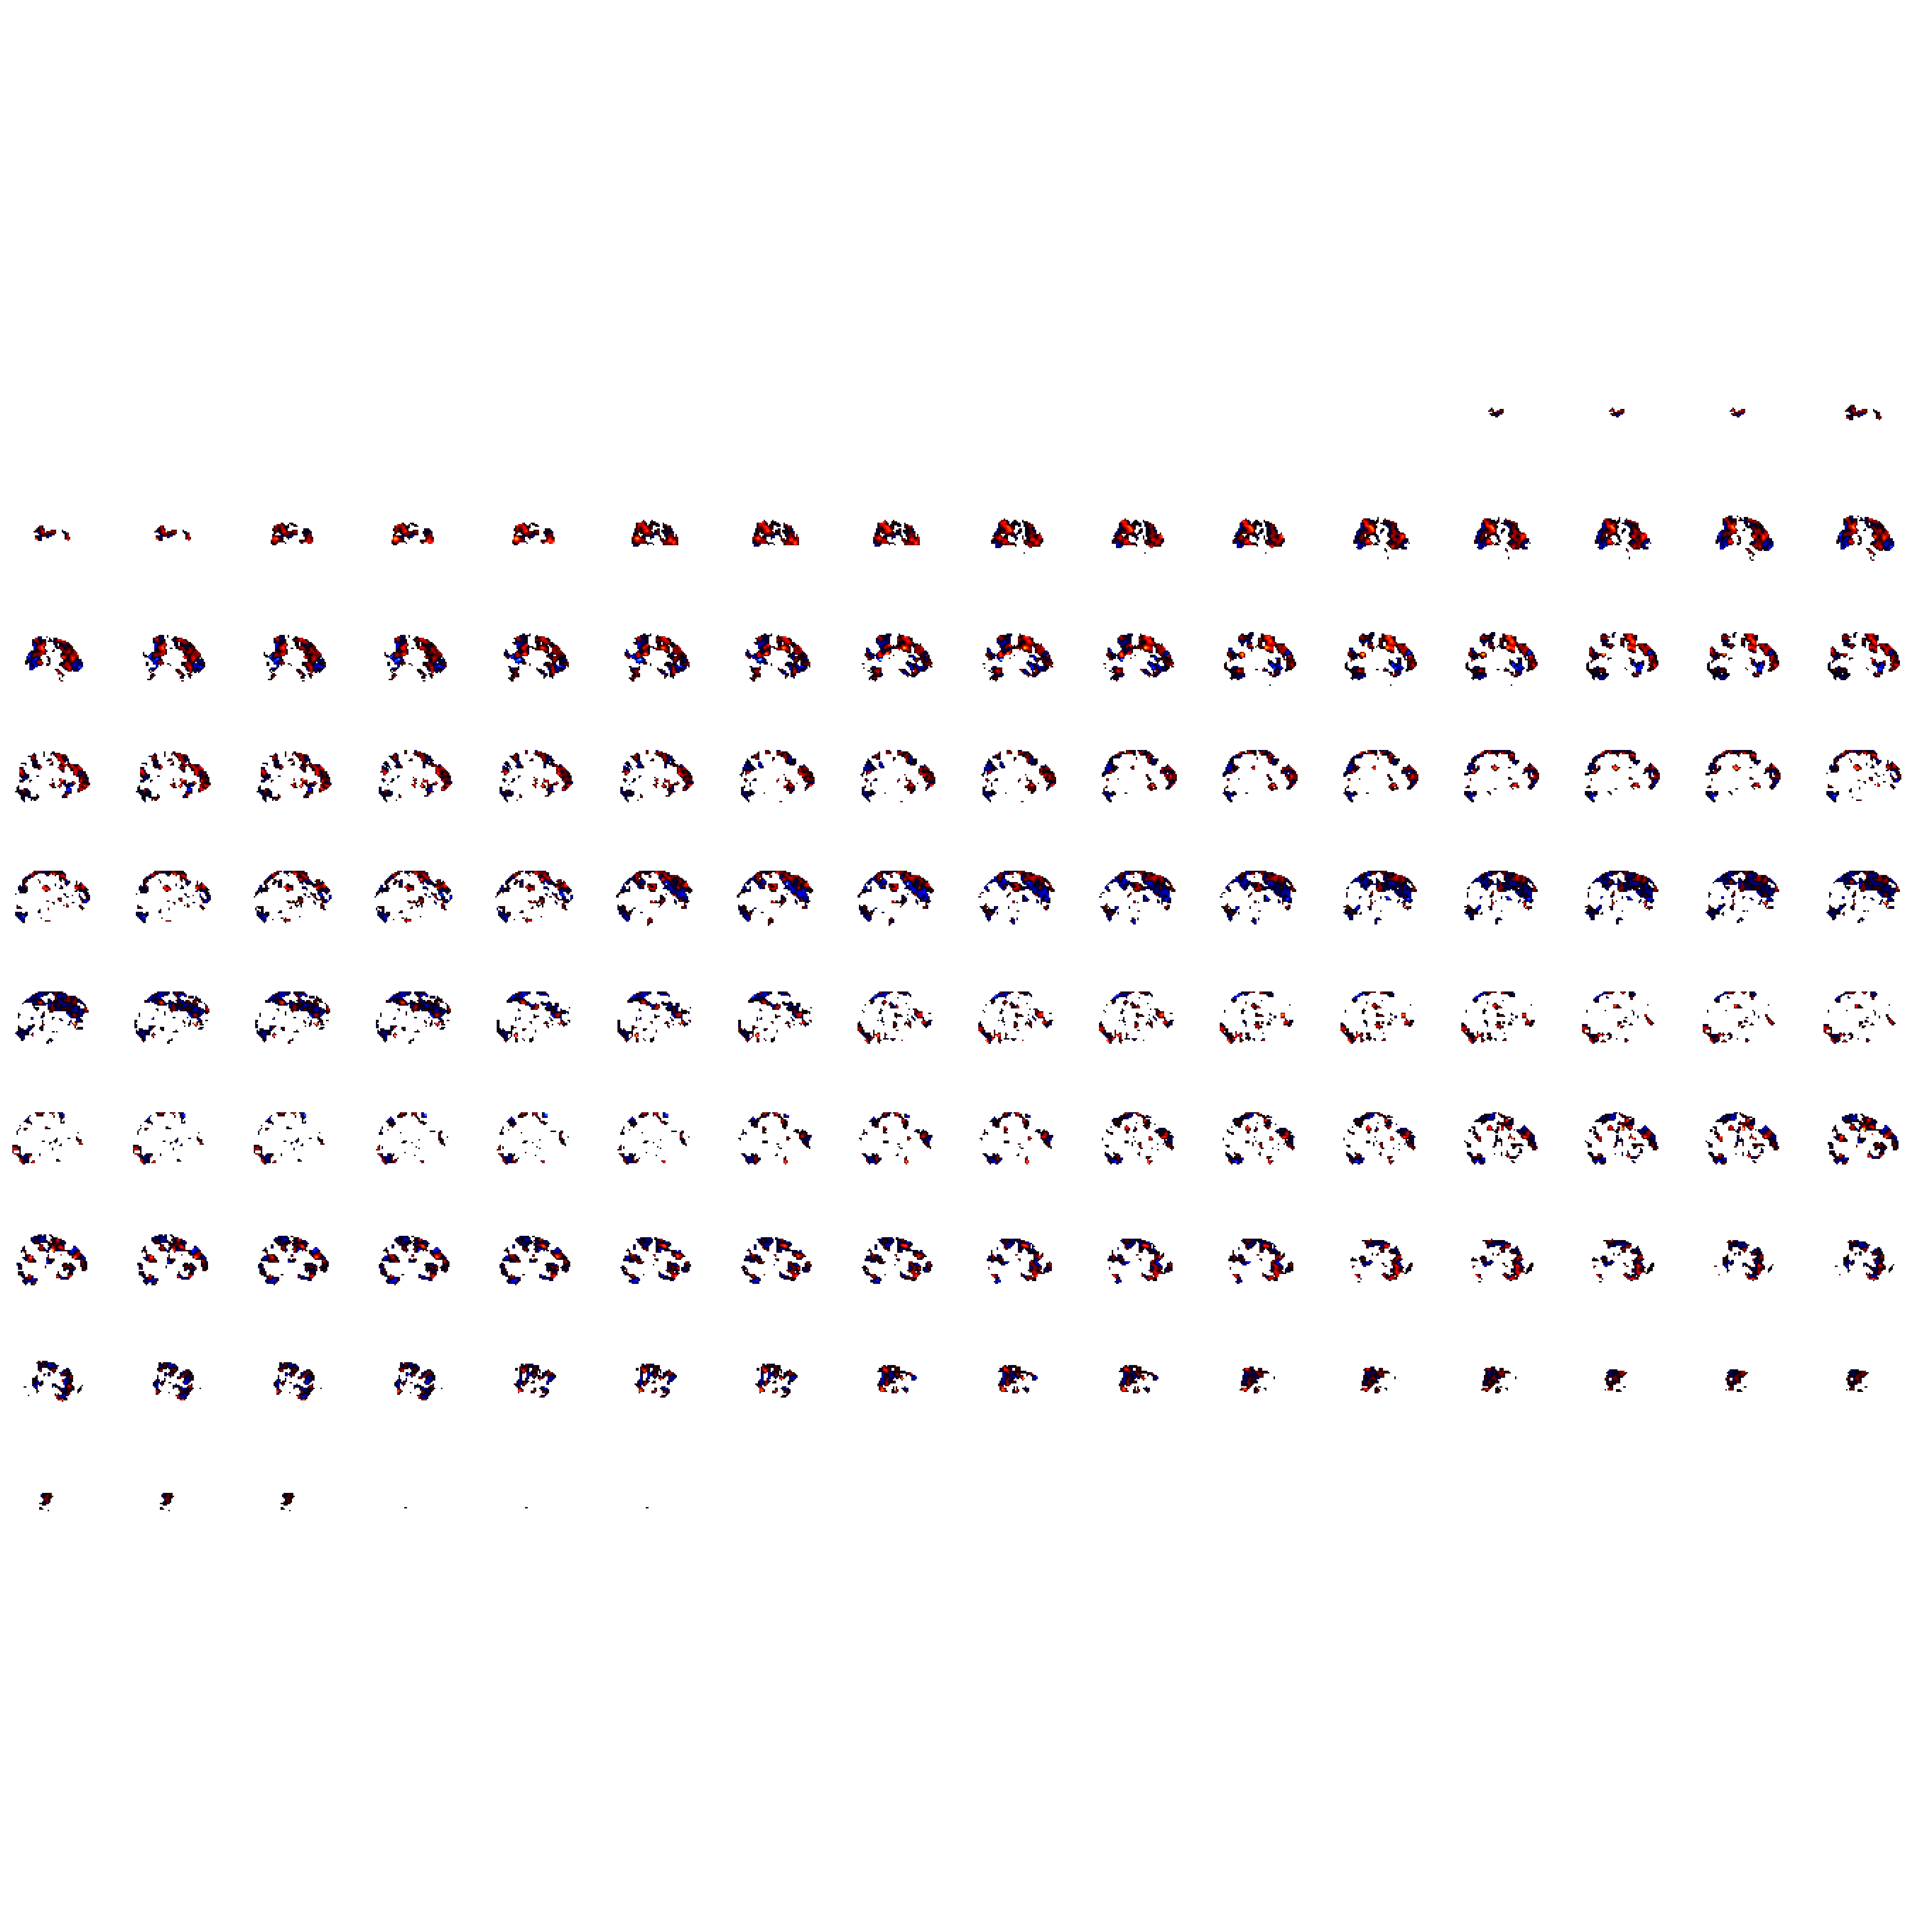

In [140]:
coef_img = decoder.coef_img_[1]
decoder.coef_img_[1].to_filename('S01_svc_weights.nii.gz')
plotting.view_img(
    decoder.coef_img_[1], bg_img=S01_anat, title="S01 SVM weights", dim=-1
)

In [141]:
### Chance level accuracy? still have no session_labels

dummy_decoder = Decoder(estimator='dummy_classifier', mask=mask01, cv=cv)
dummy_decoder.fit(S01_fimg, S01labels, groups=session_labels)
print(dummy_decoder.cv_scores_)

NameError: name 'session_labels' is not defined